In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv("C:/Users/nkm/Downloads/Nat_Gas.csv")

df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [3]:
df.rename(columns={"Dates": "Date", "Prices": "Price"}, inplace=True)

df.head()


,Date,Price
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   Price   48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


C:\Users\nkm\AppData\Local\Temp\ipykernel_75872\3108488314.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


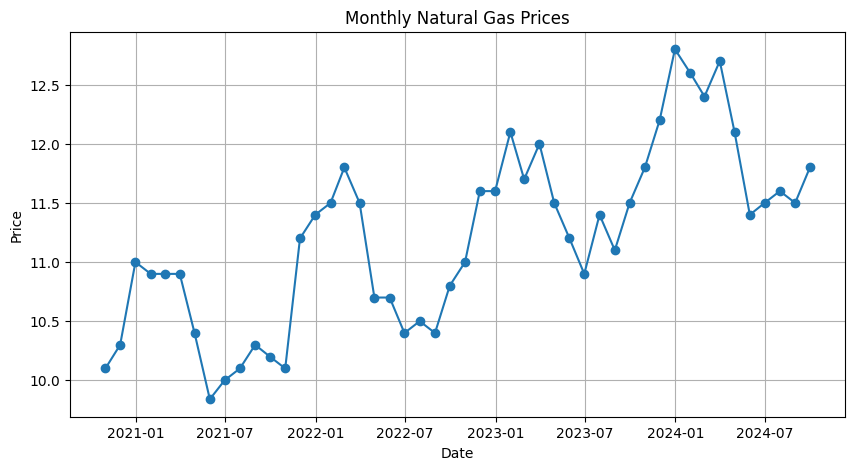

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Price"], marker="o")
plt.title("Monthly Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [ ]:
# Observation:
# The data shows clear seasonal variation in natural gas prices,
# with higher prices during winter months and lower prices during summer months. There is also a gradual long-term trend, which can be used to estimate future contract prices.


In [6]:
def estimate_gas_price(input_date):
    input_date = pd.to_datetime(input_date)

    # Convert dates to numeric values
    df["timestamp"] = df["Date"].map(pd.Timestamp.toordinal)

    # Train regression model
    coeffs = np.polyfit(df["timestamp"], df["Price"], 1)

    # Predict price
    input_timestamp = input_date.toordinal()
    predicted_price = coeffs[0] * input_timestamp + coeffs[1]

    return round(predicted_price, 2)
